# Spam Emails Classifier
This project focuses on the classification of spam emails using machine learning models. The primary objective is to develop a system capable of accurately distinguishing between spam and non-spam (ham) emails.

## Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


## Load CSV

In [2]:
# Load CSV
df = pd.read_csv('messages.csv')
df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


## Cleaning Data
Since the 'Subject' column is not considered for this predictions, the column will be removed from the dataframe.

In [3]:
# Cleaning 
del df['subject']
df.head()

,message,label
0,content - length : 3386 apple-iss research cen...,0
1,"lang classification grimes , joseph e . and ba...",0
2,i am posting this inquiry for sergei atamas ( ...,0
3,a colleague and i are researching the differin...,0
4,earlier this morning i was on the phone with a...,0


## Train-Test Split
Splitting the data set as 30% Test and 70% Train datasets

In [4]:
# Split dataset into -> Train (70%) and Test
X = df['message']
Y = df['label']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=26)

# Method 1: Preporcessing using bag of words and use MultinomiaNB and LinearSVC Models
## Preprocessing
### Remove Stop Words and generate Bag of Words
Stop words are a set of commonly used words in a language. Examples of stop words in English are “a,” “the,” “is,” “are,” etc. Stop words are commonly used in Text Mining and Natural Language Processing (NLP) to eliminate words that are so widely used that they carry very little useful information

In [5]:
# Remove stop words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=3000)
x_train_bow = pd.DataFrame(vectorizer.fit_transform(x_train).toarray())
x_test_bow = pd.DataFrame(vectorizer.fit_transform(x_test).toarray())

## Define Models

In [6]:
# Run model
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

model1 = MultinomialNB()
model2 = LinearSVC()

model1.fit(x_train_bow, y_train)
model2.fit(x_train_bow, y_train)

/Users/hiroonwijekoon/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

## Test Models

In [7]:
# Test model

y_predi1 = model1.predict(x_test_bow)
y_predi2 = model2.predict(x_test_bow)
print("Model 1: MultinomialNB")
conf_matrix_multinomialnb = confusion_matrix(y_test,y_predi1)
print(conf_matrix_multinomialnb)
print(accuracy_score(y_test, y_predi1))
print(" ")
print("Model 2: LinearSVC")
conf_matrix_LinearSVC = confusion_matrix(y_test,y_predi2)
print(conf_matrix_LinearSVC)
print(accuracy_score(y_test, y_predi2))


Model 1: MultinomialNB
[[720   4]
 [132  12]]
0.8433179723502304
 
Model 2: LinearSVC
[[649  75]
 [125  19]]
0.7695852534562212


# Method 2: Preporcessing using TF-IDF and use RandomForest Classifier, Neural Network and Decision Tree for Classification
## Preprocessing
### Convert textual data into numerical vectors using TF-IDF technique
TF-IDF (Term Frequency-Inverse Document Frequency) preprocessing is a technique used in natural language processing (NLP) to represent the importance of a term within a document relative to a collection of documents. It consists of two main components:

- TF (Term Frequency): This component calculates the frequency of a term within a document. It's a measure of how often a term appears in a document. A higher frequency suggests that the term is more important in that particular document.

- IDF (Inverse Document Frequency): This component measures how important a term is across the entire corpus of documents. Terms that occur frequently in many documents are considered less important, while terms that occur rarely are considered more important. IDF is calculated as the logarithm of the ratio of the total number of documents to the number of documents containing the term.

The TF-IDF score for a term in a document is calculated by multiplying its TF and IDF scores. This preprocessing technique is commonly used to convert textual data into numerical vectors, where each dimension represents a unique term in the vocabulary, and the value of each dimension represents the importance of the corresponding term in the document. TF-IDF is often used in tasks such as text classification, information retrieval, and document similarity analysis.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidVectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
x_train_tfidf = pd.DataFrame(tfidVectorizer.fit_transform(x_train).toarray())
x_test_tfidf = pd.DataFrame(tfidVectorizer.fit_transform(x_test).toarray())


## Random Forest Classifier

RandomForestClassifier is an ensemble learning method for classification. It fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. This classifier works by constructing multiple decision trees during training and outputs the class that is the mode of the classes of the individual trees.

In [9]:
# Define model
from sklearn.ensemble import RandomForestClassifier

model_random_forest = RandomForestClassifier(max_depth=1000, random_state=0)

# Train Model
model_random_forest.fit(x_train_tfidf, y_train)

# Test Model
y_predi4 = model_random_forest.predict(x_test_tfidf)

conf_matrix_RandomForestClassifier = confusion_matrix(y_test,y_predi4)
print("Model 4: Random Forest Classifier")
print(conf_matrix_RandomForestClassifier)
print(accuracy_score(y_test, y_predi4))

Model 4: Random Forest Classifier
[[721   3]
 [ 99  45]]
0.8824884792626728


### Visualizing the confusion matrix

Here a heatmap visualization of the confusion matrix is generated, providing a graphical representation of the classifier's performance. The confusion matrix displays the counts of true positive, true negative, false positive, and false negative predictions made by the classifier.



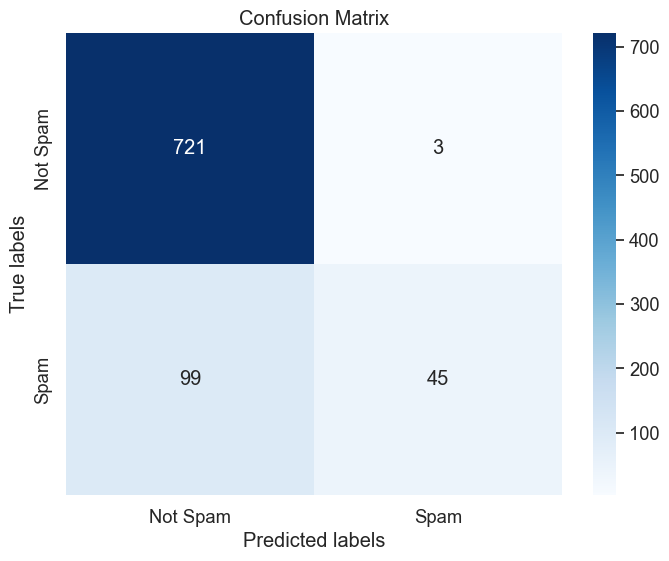

In [10]:
# Define class labels
class_names = ['Not Spam', 'Spam']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix_RandomForestClassifier, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## Classification using Neural Network

SpamEmailClassifier is a neural network model written from the scratch for classifying email messages as either spam or not spam. It utilizes an embedding layer to convert input tokens into dense vectors, followed by fully connected layers for feature extraction and classification.

In [11]:
class SpamEmailClassifier(nn.Module):
    def __init__(self, num_classes):
        super(SpamEmailClassifier, self).__init__()

        vocab_size = 20000  # vocabulary size (different words)
        embedding_dim = 100 
        hidden_dim = 100  # Number of neurons 

        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # Fully connected layers
        self.fc1 = nn.Linear(embedding_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        # Input shape: (batch_size, sequence_length)
        embedded = self.embedding(x)  # Output shape: (batch_size, sequence_length, embedding_dim)
        pooled = torch.mean(embedded, dim=1) 
        # Fully connected layers
        x = self.fc1(pooled)
        x = self.relu(x)
        x = self.fc2(x)

        return x

In [12]:
# Initialize the model
model = SpamEmailClassifier(num_classes=2)
print(model)

SpamEmailClassifier(
  (embedding): Embedding(20000, 100)
  (fc1): Linear(in_features=100, out_features=100, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=100, out_features=2, bias=True)
)


In [13]:
# Convert data to PyTorch tensors
x_train_tensor = torch.tensor(x_train_tfidf.values).float()
y_train_tensor = torch.tensor(y_train.values).long()
x_test_tensor = torch.tensor(x_test_tfidf.values).float()
y_test_tensor = torch.tensor(y_test.values).long()

In [14]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()

### Train the model

In here the model is trained a PyTorch model while optimizing performance on different hardware devices. It moves the model and input tensors to the selected device (GPU if available, otherwise CPU) and updates the optimizer accordingly.

In [15]:
# Training the model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Optimize performance on Apple Silicon Processors


print("Selected device",device)

model.to(device)  # Move the model to the selected device
# Move the optimizer to the selected device
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) 

epochs = 200
batch_size = 64
for epoch in range(epochs):
    model.train()
    for i in range(0, len(x_train_tensor), batch_size):
        inputs = x_train_tensor[i:i+batch_size].to(device).long()  # Move inputs to device
        labels = y_train_tensor[i:i+batch_size].to(device)  # Move labels to device

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

Selected device cpu


## Check predictions and accuracy of the model

Following code defines a function to predict labels using a trained PyTorch model. It takes the model and test data as input, performs inference, calculates accuracy, and computes the confusion matrix.

In [16]:
# Function to predict labels using the trained model
def predict_labels(model, x_data):
    model.eval()
    with torch.no_grad():
        outputs = model(x_data.long())  # Convert to LongTensor
        _, predicted = torch.max(outputs, 1)
    return predicted.numpy()

# Predict labels for test data
y_pred = predict_labels(model, x_test_tensor)

# Convert ground truth labels to NumPy array
y_test_np = y_test_tensor.numpy()

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test_np, y_pred)
conf_matrix_NN = confusion_matrix(y_test_np, y_pred)

print("Model 3:CNN")
print(conf_matrix_NN)
print("Accuracy:", accuracy)


Model 3:CNN
[[724   0]
 [144   0]]
Accuracy: 0.8341013824884793


### Visualizing the confusion matrix

Here a heatmap visualization of the confusion matrix is generated, providing a graphical representation of the classifier's performance. The confusion matrix displays the counts of true positive, true negative, false positive, and false negative predictions made by the classifier.



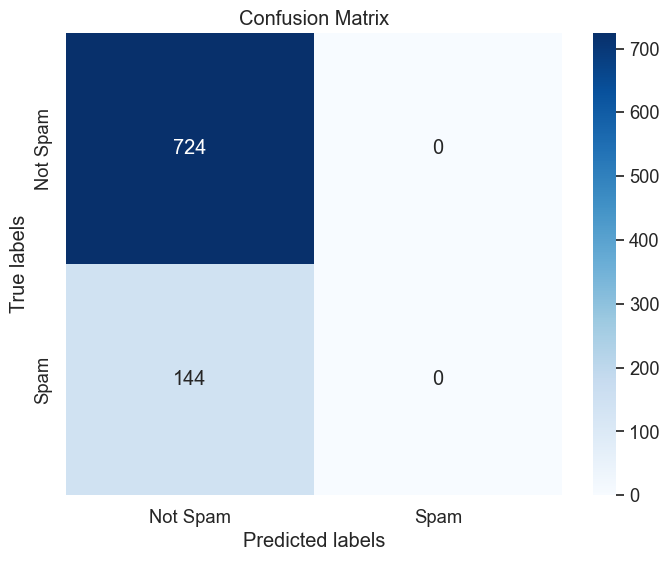

In [17]:
# Define class labels
class_names = ['Not Spam', 'Spam']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix_NN, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## Classification using Decision Tree
The code defines, trains, and tests a Decision Tree classifier using the TF-IDF transformed data. It utilizes the scikit-learn library for machine learning operations

In [19]:
# Define model
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

model_decision_tree = DecisionTreeClassifier(random_state=0)                       

# Train Model
model_decision_tree.fit(x_train_tfidf, y_train)

# Test Model
y_predi5 = model_decision_tree.predict(x_test_tfidf)

conf_matrix_DecisionTreeClassifier = confusion_matrix(y_test,y_predi5)
print("Model 4: Random Forest Classifier")
print(conf_matrix_DecisionTreeClassifier)
print(accuracy_score(y_test, y_predi5))

Model 4: Random Forest Classifier
[[629  95]
 [ 74  70]]
0.8052995391705069


### Visualization of the confusion matrix

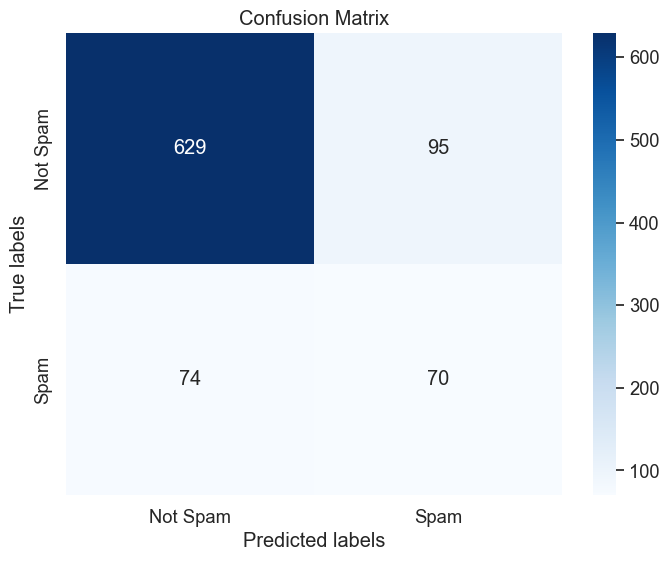

In [20]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix_DecisionTreeClassifier, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Compare Results of all models

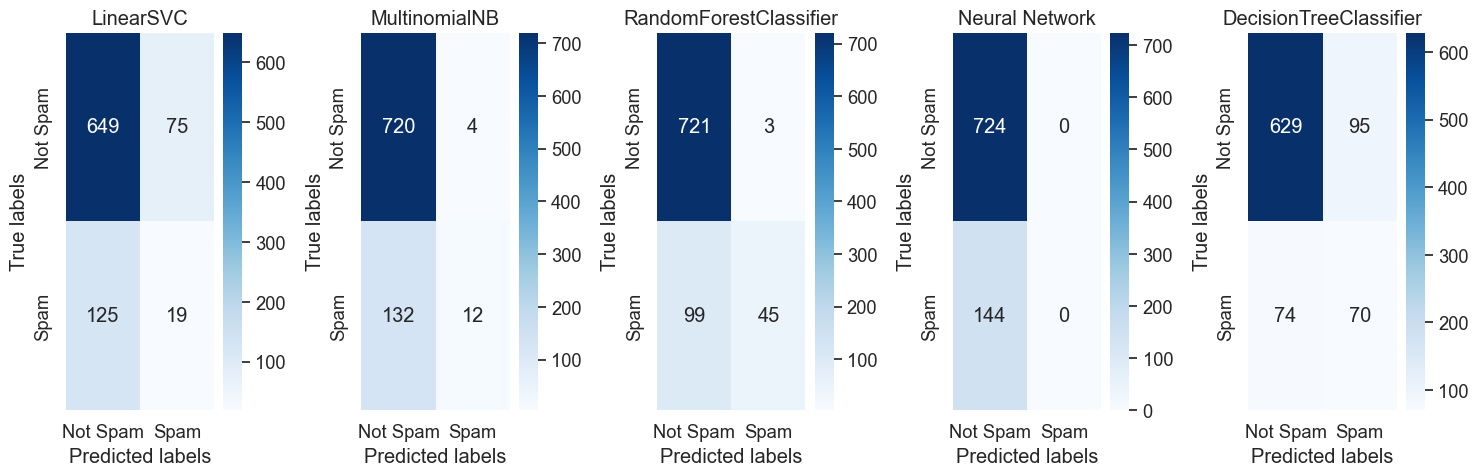

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define class labels
class_names = ['Not Spam', 'Spam']

# Plot confusion matrices
plt.figure(figsize=(15, 5))

# Plot confusion matrix 1
plt.subplot(1, 5, 1)
sns.heatmap(conf_matrix_LinearSVC, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('LinearSVC')

# Plot confusion matrix 2
plt.subplot(1, 5, 2)
sns.heatmap(conf_matrix_multinomialnb, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('MultinomialNB')

# Plot confusion matrix 3
plt.subplot(1, 5, 3)
sns.heatmap(conf_matrix_RandomForestClassifier, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('RandomForestClassifier')

# Plot confusion matrix 4
plt.subplot(1, 5, 4)
sns.heatmap(conf_matrix_NN, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Neural Network')

# Plot confusion matrix 5
plt.subplot(1, 5, 5)
sns.heatmap(conf_matrix_DecisionTreeClassifier, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('DecisionTreeClassifier')

plt.tight_layout()
plt.show()
